In [1]:
HTML("""
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>
""")

HTML{String}("<style>\n.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {\n     font-size: 100%;\n}\n</style>\n")

## 1.1 为什么需要量子计算

### 后摩尔时代

我们对算力的需求在不断增长，但是摩尔定律却不再有效了。

#### 摩尔定律

<div>
<img src="https://plot.ly/~rjprzy/4.png" alt="Moore&#39;s Law Makes Computing Better Every 2 Years Since 1947" style="max-width: 100%; height: 600px; width: 1000px;"  height="600" width="1000" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" />
</div>

- 新的思路（三维堆叠，etc）
- 定制芯片（GPU，TPU，FPGA，etc）
- 更换计算模型（量子计算，etc）

### 量子多体物理的维度诅咒

**量子多体物理**是指多个具有量子效应的物理对象所构成的系统。这种系统所构成的状态空间往往随着它的粒子数目的增长而指数增长。而量子多体物理的理论研究，将直接对新型材料，新型药物的研究造成影响。

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Kagome-lattice-bw.svg/1298px-Kagome-lattice-bw.svg.png" alt="kagome"  width="300"/>
</div>

而由于指数增长的空间大小，经典计算机难以精确模拟复杂的多体系统，而需要进行一些假设，简化等，常见的方法包括但不限于：

- DFT，密度泛函

- DMRG，密度矩阵重整化，张量网络

- QMC，量子蒙特卡洛，变分量子蒙特卡洛

其中的很多方法对于计算资源的消耗是巨大的。例如[PEPS++](https://arxiv.org/abs/1806.03761)这个工作甚至用上了中国最强的超级计算机神威太湖之光整机。

所以有人就想：**能不能用量子系统模拟量子系统呢？**

这个人就是：费恩曼（Feynman）[Simulating Physics with Computers](https://people.eecs.berkeley.edu/~christos/classics/Feynman.pdf)

![](https://upload.wikimedia.org/wikipedia/en/4/42/Richard_Feynman_Nobel.jpg)

当然后来在这个想法上有很多工作，用一个可以精确操纵的量子系统模拟另外一个量子系统也称为量子模拟（Quantum Simulation）。这也是被认为一个在近期最有可能成为量子计算机的杀手级应用的方向。

### 作为基础学科的启发性研究

#### 启发经典算法设计

- [Quantum Inspired Recommendation System](https://arxiv.org/abs/1807.04271)
- [Quantum Inspired PCA](https://arxiv.org/abs/1811.00414)
- [Simulated Quantum Annealing Can Be Exponentially Faster than Classical Simulated Annealing](https://arxiv.org/abs/1601.03030)

#### 帮助我们获得精确控制量子系统的能力

- 控制单量子比特系统
- 控制多量子比特系统
- etc...

#### 帮助我们理解这个世界

- 量子机器学习
- 宇宙学：[Quantum Circuit Cosmology: The Expansion of the Universe Since the First Qubit](https://arxiv.org/abs/1702.06959)
- 黑洞：[Quantum Circuit Model of Black Hole Evaporation](https://arxiv.org/abs/1807.07672)
- etc.

### 阅读材料（可能需要VPN）

- [Why we need quantum computing](https://www.research.ibm.com/ibm-q/learn/what-is-quantum-computing/#)
- [Julia语言入门](https://www.bilibili.com/video/av28178443/)


### 课程将用到的材料

- Michael A. Nielsen & Isaac L. Chuang, Quantum Computation & Quantum Information
- Yao.jl - Extensible Efficient Quantum Algorithm Design for Humans

## 1.2 经典的逻辑电路

经典的逻辑电路构成了我们现代计算机的基础，本章我们将着重学习一些经典逻辑电路的基础知识，然后之后我将介绍如何从经典的逻辑电路过度到量子线路。

### 逻辑比特

一般情况下我们往往使用比特，也就是两种不同的物理状态来进行计算，我们将其称为**比特**。而理论上，我们将这两种状态抽象出来，用数学符号表示之，从而简化问题。我们将这样的抽象称为**逻辑比特**，一个理论的逻辑比特，在实际的物理实现上有可能对应多个**物理比特**。

我们可以使用我们的**Yao**来定义一组逻辑比特

In [2]:
using Yao

ArrayReg(bit"000")

┌ Info: Recompiling stale cache file /Users/roger/.julia/compiled/v1.1/Yao/TDiQQ.ji for Yao [5872b779-8223-5990-8dd0-5abbb0748c8c]
└ @ Base loading.jl:1184


ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 3/3

逻辑比特的向量表示，实际上我们也可以用一个one hot向量表示逻辑比特，例如逻辑比特01，可以表示为


| 向量的元素值 | 对应的逻辑比特 |
| ---------- | ------------ |
|     0      |     00       |
|     1      |     01       |
|     0      |     10       |
|     0      |     11       |

### 逻辑门

逻辑门是操作逻辑比特的一种特殊函数，它的输入是二进制的比特，输出是另外一组二进制的比特。我们常见的操作有逻辑：与，或，非

与：

- 如果两个输入的比特都为0，那么输出0
- 如果两个输入的比特都为1，那么输出1
- 如果两个输入的比特不同，那么也输出0

### 布尔代数和真值表

用文字描述上面的操作非常麻烦，数学上我们有布尔代数和真值表来描述逻辑电路。例如非门：

非：

- 如果输入的比特为 0，那么输出1
- 如果输入的比特为 1，那么输出0

真值表

| $A$ | $\neg A$ |
|-----|----------|
|  0  |    1     |
|  1  |    0     |

如果我们用一个独热编码（onehot）的向量来表示一个逻辑比特，那么我们可以用线性代数来表示逻辑门的运算，例如我们用如下的方式表示单个比特

$$
0 = \begin{pmatrix} 1\\ 0 \end{pmatrix}, \quad 1 = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

我们有

$$
\neg 0 = \begin{pmatrix} 0 & 1\\1 & 0 \end{pmatrix} \begin{pmatrix} 1\\ 0 \end{pmatrix} = \begin{pmatrix} 0\\ 1\end{pmatrix} = 1
$$

同理有

$$
\neg 1 = \begin{pmatrix} 0 & 1\\1 & 0 \end{pmatrix} \begin{pmatrix} 0\\ 1 \end{pmatrix} = \begin{pmatrix} 1\\ 0\end{pmatrix}
$$

我们以后为了简便，将这个矩阵记为 **X**

你可以用Yao来验证上述结论，其中 **X** 即为我们所说的非门

In [3]:
apply!(ArrayReg(bit"0"), X) == ArrayReg(bit"1")

true

#### 练习

1. 或门（**OR**）是一个两比特门，它的定义是只要两个比特中有一个比特是 1 那么就输出 1，写出它的真值表和矩阵形式
2. Toffli门是一个三比特门，它的输入是 **A,B,C**，定义为 **A, B** 为控制比特，当**A，B** 都为1时，翻转 **C**

#### 答案

#### 1. 或门（**OR**）

真值表

| AB | **OR**(A, B) |
| -- | ------------ |
| 00 | 0            |
| 01 | 1            |
| 10 | 1            |
| 11 | 1            |

矩阵形式

$$
OR = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 1 & 1
\end{pmatrix}
$$

我们有

$$
\begin{pmatrix}1\\0\\0\\0 \end{pmatrix} \cdot OR = \begin{pmatrix}1\\0\end{pmatrix}\quad
\begin{pmatrix}0\\1\\0\\0 \end{pmatrix} \cdot OR = \begin{pmatrix}0\\1\end{pmatrix}\quad
\begin{pmatrix}0\\0\\1\\0 \end{pmatrix} \cdot OR = \begin{pmatrix}0\\1\end{pmatrix}\quad
\begin{pmatrix}0\\0\\0\\1 \end{pmatrix} \cdot OR = \begin{pmatrix}0\\1\end{pmatrix}
$$

#### 2. Toffli门

真值表

|     ABC     | 000 | 001 | 010 | 011 | 100 | 101 | 110 | 111 |
|:-----------:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Toffli(ABC) | 000 | 001 | 010 | 011 | 100 | 101 | 111 | 110 |

矩阵

In [4]:
using Latexify

latexarray(Int.(mat(ConstGate.Toffoli)))

L"\begin{equation}
\left[
\begin{array}{cccccccc}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

### 可逆计算

可逆计算，顾名思义是说计算过程中不会丢失信息，可以从结果反推出初始状态的计算过程。

In [5]:
Int.(inv(mat(ConstGate.Toffoli)))

8×8 Array{Int64,2}:
 1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  1
 0  0  0  0  1  0  0  0
 0  0  0  0  0  1  0  0
 0  0  0  0  0  0  1  0
 0  0  0  1  0  0  0  0

对一个比特，可逆计算的门有哪些？

两个比特呢？

CNOT（控制翻转）就是一种，因为连续进行两次翻转就会回到原先的状态

In [6]:
CNOT = control(2, 2, 1=>X)
Int.(mat(CNOT))

4×4 Array{Int64,2}:
 1  0  0  0
 0  1  0  0
 0  0  0  1
 0  0  1  0

三个比特呢？

Toffli门就是三个比特的可逆门，试试看用Toffli连续作用两次会发生什么？

In [7]:
using Yao

r = rand_state(3)
r1 = copy(r) |> ConstGate.Toffoli |> ConstGate.Toffoli
r1 ≈ r

true

可逆计算要求，存在对应矩阵的逆矩阵，对于一个门的矩阵形式 $A$，存在 $B$ 使得他们的乘积为1

$$
A B = I, \quad \exists B
$$

### 从经典到量子

如果我们不限制这些门矩阵只能是实数0或者1，也不限制状态向量是onehot向量呢？

## 1.3 量子线路模型

上一节我们学习了经典线路模型。而量子线路模型可以看作是经典线路模型的推广

### 量子态

量子线路使用量子态表示当前的计算状态，我们将经典线路中对状态为onehot的要求放松一些：

允许**任意复数，模为1的向量作为当前计算的状态表示。**

而它的物理意义即为量子力学中的量子态。很自然的，他们可以这样叠加

In [8]:
r = ArrayReg(bit"010") + ArrayReg(bit"110")

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 3/3

In [9]:
state(r)

8×1 Array{Complex{Float64},2}:
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im

而量子态可以在物理过程上用Unitary矩阵进行演化。

所以我们要求量子线路中的门也都是unitary，回想上一节的结论：**量子计算的是一种可逆计算**，每个量子门的逆就是它的共轭转置（adjoint，dagger）

恰好，我们上一节介绍的几个可逆的门都是unitary矩阵，例如CNOT和Toffli

In [10]:
isunitary(CNOT)

true

In [11]:
isunitary(ConstGate.Toffoli)

true

## Bloch球

对于一个量子比特，它的向量表示为

$$
\begin{pmatrix}
a\\
b
\end{pmatrix}
$$

由于我们要求它的模为1，很自然的，由于 $a^2 + b^2 = 1$ 我们有

$$
a = cos{\theta} e^{i\delta}, \quad b = sin{\theta} e^{i(\phi + \delta)}
$$

忽略全局global phase （为什么？）就可以得到

$$
\Psi = cos{\theta} |0\rangle + sin{\theta} e^{i\phi} |1\rangle
$$

这也就意味着，任何对单比特的操作都可以看成是Bloch球上的旋转。让我们来试几个单比特门

(打开[bloch_sphere.jl](https://github.com/QuantumBFS/SSSS/blob/master/4_quantum/bloch_sphere.jl))

### 1. Pauli门

In [12]:
mat(X)

2×2 LuxurySparse.PermMatrix{Complex{Float64},Int64,Array{Complex{Float64},1},Array{Int64,1}}:
    0       1.0+0.0im
 1.0+0.0im     0     

Pauli门是常数门，Yao会提前分配常数门的矩阵所需的内存，不需要担心使用常数门进行计算会发生额外的内存分配

In [13]:
@allocated mat(X)

0

而定义一个新的常数门也仅仅只需要一行

In [14]:
@const_gate MyConstGate = rand(4, 4)

In [15]:
@allocated mat(MyConstGate)

0

In [16]:
nqubits(MyConstGate)

2

### 2. Phase门

### 3. 旋转门

1. Rx

2. Ry

3. Rz

旋转门的矩阵形式是：

$$
cos{\frac{\theta}{2}} \mathbf{I} - i sin{\frac{\theta}{2}} \mathbf{U}
$$


In [17]:
mat(Rx(0.1))

2×2 StaticArrays.SArray{Tuple{2,2},Complex{Float64},2,4}:
 0.99875+0.0im            0.0-0.0499792im
     0.0-0.0499792im  0.99875+0.0im      

### 4. Hadmard门

## 2.1 制备一个GHZ态

<img src="https://quantumbfs.github.io/Yao.jl/latest/assets/figures/ghz4.png" width=800></img>

在Yao里我们用block来描述量子线路，最基本的门是primitive block，例如我们这里要用到的X门和H门，primitive block是指没有subblock（子block）的block

In [18]:
using Yao
subblocks(X)

()

而我们使用不同的composite block将block组装起来就可以构建出更大的quantum circuit。例如我们可以将H门串起来

In [19]:
chain(H, H, H, H)

nqubits: 1, datatype: Complex{Float64}
chain
├─ H gate
├─ H gate
├─ H gate
└─ H gate

这就构成来一个非常简单的量子线路，它会不断对输入的单比特作用Hadmard门

而有了横向组装门的方法，我们如何在纵向组装呢？你可以用kron，纵向排列的门相当于这些门的张量积。别忘了利用语法糖

In [20]:
kron(H for _ in 1:4)

nqubits: 4, datatype: Complex{Float64}
kron
├─ 1=>H gate
├─ 2=>H gate
├─ 3=>H gate
└─ 4=>H gate

当然你也可以指定位置，但是这个时候就要记得输入比特的数量，因为程序并不能够自己推导出总共的比特数目

In [21]:
kron(4, 1=>X, 3=>H)

nqubits: 4, datatype: Complex{Float64}
kron
├─ 1=>X gate
└─ 3=>H gate

但是加入我忘记输入比特数目，或者我暂时还没想好要用多少个比特怎么办？没关系！

In [22]:
kron(1=>X, 3=>H)

(n -> kron(n, 1 => X gate, 3 => H gate))

Yao在无法推导出比特数目的时候会返回一个以总比特数为输入的匿名函数，你依然可以把它当作正常的block来使用，Yao会在能够推导出比特数目的时候自动把它填进去，例如

In [23]:
chain(kron(1=>X, 3=>H), kron(H for _ in 1:4))

nqubits: 4, datatype: Complex{Float64}
chain
├─ kron
│  ├─ 1=>X gate
│  └─ 3=>H gate
└─ kron
   ├─ 1=>H gate
   ├─ 2=>H gate
   ├─ 3=>H gate
   └─ 4=>H gate


但是GHZ里还有控制门，这个要怎么写呢？类似的在Yao里我们使用Julia自带的 `Pair` 类型来指定位置，一个1号比特控制2号比特上X门的控制模块可以这么写

In [24]:
control(4, 1, 2=>X)

nqubits: 4, datatype: Complex{Float64}
control(1)
└─ (2,) X gate

注意，如果你不写总比特数，就会返回一个函数

In [25]:
control(1, 2=>X)

(n -> control(n, 1, 2 => X gate))

那么到这里我们就可以构建上面画的这个GHZ的线路了

In [26]:
circuit = chain(
    kron(1=>X, (k=>H for k in 2:4)...), # 第一层
    control(2, 1=>X), # 第一个CNOT
    control(4, 3=>X),
    control(3, 1=>X),
    control(4, 3=>X),
    kron(H for _ in 1:4), # 最后一层H
)

nqubits: 4, datatype: Complex{Float64}
chain
├─ kron
│  ├─ 1=>X gate
│  ├─ 2=>H gate
│  ├─ 3=>H gate
│  └─ 4=>H gate
├─ control(2)
│  └─ (1,) X gate
├─ control(4)
│  └─ (3,) X gate
├─ control(3)
│  └─ (1,) X gate
├─ control(4)
│  └─ (3,) X gate
└─ kron
   ├─ 1=>H gate
   ├─ 2=>H gate
   ├─ 3=>H gate
   └─ 4=>H gate


注意上面的门的作用顺序和线路图略有不同（线路里两个control是同时作用的），但是是等价的。

接下来让我们来验证一下，这个线路是否能够从000制备出GHZ态

In [27]:
r = ArrayReg(bit"0000") |> circuit

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 4/4

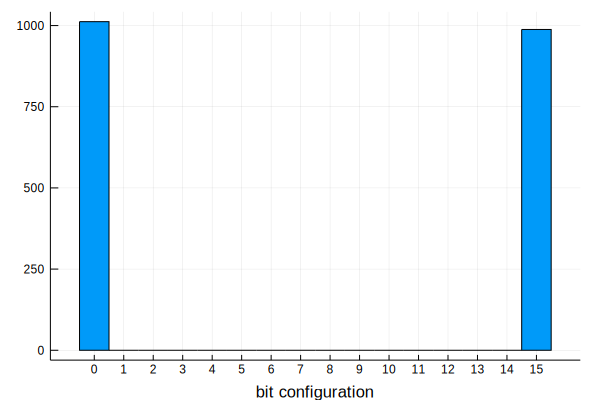

In [28]:
using Plots

results = measure(r; nshots=2000);
histogram(results; nbins=16, legend=nothing, xlabel="bit configuration", xticks=((0:15).+0.5, 0:15))

虽然一般的来说，构建线路只需要 `control`, `chain`, `kron` 三种复合模块就可以了，但是对于数值模拟，但是实际使用上我们还提供了很多不同的复合模块来帮助你快速定义模型，比如上面一排Hadmard的例子，你可以直接使用repeat模块来构造

In [29]:
repeat(4, H)

nqubits: 4, datatype: Complex{Float64}
repeat on (1, 2, 3, 4)
└─ H gate

我们不妨来看看repeat的文档，Yao的大部分函数都可以在help模式中查看文档和用例

In [30]:
?repeat(4, H)

```
repeat(n, x::AbstractBlock[, locs]) -> RepeatedBlock{n}
```

Create a [`RepeatedBlock`](@ref) with total number of qubits `n` and the block to repeat on given location or on all the locations.

# Example

This will create a repeat block which puts 4 X gates on each location.

```jldoctest
julia> repeat(4, X)
nqubits: 4, datatype: Complex{Float64}
repeat on (1, 2, 3, 4)
└─ X gate
```

You can also specify the location

```jldoctest
julia> repeat(4, X, (1, 2))
nqubits: 4, datatype: Complex{Float64}
repeat on (1, 2)
└─ X gate
```

But repeat won't copy the gate, thus, if it is a gate with parameter, e.g a `phase(0.1)`, the parameter will change simultaneously.

```jldoctest
julia> g = repeat(4, phase(0.1))
nqubits: 4, datatype: Complex{Float64}
repeat on (1, 2, 3, 4)
└─ phase(0.1)

julia> g.content
phase(0.1)

julia> g.content.theta = 0.2
0.2

julia> g
nqubits: 4, datatype: Complex{Float64}
repeat on (1, 2, 3, 4)
└─ phase(0.2)
```


然后对单个的模块我们还可以直接用put，而不用专门kron

In [31]:
put(4, 1=>X)

nqubits: 4, datatype: Complex{Float64}
put on (1)
└─ X gate

put虽然可以作用任意大小的block，但是它对小的block更高效，对大的block，我们需要稍后会介绍到的concentrator。但是现在我们可以把上面的线路重写为

In [32]:
circuit2 = chain(
    4,
    put(1=>X),
    repeat(H, 2:4),
    control(2, 1=>X),
    control(4, 3=>X),
    control(3, 1=>X),
    control(4, 3=>X),
    repeat(H, 1:4),
)

nqubits: 4, datatype: Complex{Float64}
chain
├─ put on (1)
│  └─ X gate
├─ repeat on (2, 3, 4)
│  └─ H gate
├─ control(2)
│  └─ (1,) X gate
├─ control(4)
│  └─ (3,) X gate
├─ control(3)
│  └─ (1,) X gate
├─ control(4)
│  └─ (3,) X gate
└─ repeat on (1, 2, 3, 4)
   └─ H gate


## 2.2 量子傅立叶变换

量子傅立叶变换可以用下面的线路表示，试试自己用Yao来定义这个线路？

![](https://quantumbfs.github.io/Yao.jl/latest/assets/figures/qft.png)

量子傅立叶变换是很多量子算法的基础模块，它是经典的快速傅立叶变换的量子版本，经典的傅立叶变换可以写成


$$
y_k = \sum_{j=0}^{N-1} e^{\frac{2\pi i k j}{N}} x_j
$$

而量子傅立叶变换则定义为

$$
\sum_j \alpha_j |j\rangle \rightarrow \sum_k \hat{\alpha}_k |k\rangle, \quad where \quad \hat{\alpha}_k = \frac{1}{\sqrt{N}}\sum_{j}^{N-1} e^{2\pi ijk/N}\alpha_j
$$

量子傅立叶变换可以用下面的线路表示，试试自己用Yao来定义这个线路？

![](https://quantumbfs.github.io/Yao.jl/latest/assets/figures/qft.png)

它会将一个函数变换到频率空间

In [33]:
using FFTW, Interact, Plots

xs = LinRange(-5, 5, 10000)
l = @layout (1, 2)

f(x) = sin(x^2) * exp(x^2/10)


@manipulate for k in 1:0.1:2
    ys = f.(k * xs)
    plot(xs, [ys, abs.(fft(ys))], layout=l, ylims=(-10, 10), size=(1000, 200))
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15420761139591257581\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5383486546819123064\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/2d0721f8d0c54f2ad4e5202e53a922d6ebb5c6cb-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-15420761139591257581\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-5462ad4c-aa12-41ce-b126-7be7ddfcc646", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["k"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>11,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
6, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/roger/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/roger/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/roger/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/Users/roger/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/Users/roger/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.1\",\"1.2\",\"1.3\",\"1.4\",\"1.5\",\"1.6\",\"1.7\",\"1.8\",\"1.9\",\"2.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-5462ad4c-aa12-41ce-b126-7be7ddfcc646\",\"id\":\"ob_03\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-5462ad4c-aa12-41ce-b126-7be7ddfcc646\",\"id\":\"ob_02\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isA

很自然的我们可以用相位偏移来实现这个操作，因为相位偏移（phase shift）门有如下的形式：

$$
\begin{pmatrix}
1 & 0\\
0 & e^{i\theta}
\end{pmatrix}
$$

而我们上面定义的（量子）傅立叶变换可以写成下面的矩阵形式

$$
\begin{pmatrix}
1      & 1          & 1             & \dots           & 1            \\
1      & \omega     & \omega^2      & \dots           & \omega^{N-1} \\
1      & \omega^2   & \omega^4      & \dots           & \omega^{2N-2} \\
\vdots & \vdots     & \vdots        & \vdots          & \vdots \\
1      & \omega^N-1 & \omega^{2N-2} & \vdots          & \omega^{(N-1)(N-1)}
\end{pmatrix} \quad \omega^N = 1, \quad \omega = e^{2\pi i/N}
$$

我们定义下面的记号，对二进制整数有这样两种记号：

$$
\begin{aligned}
(k)_{(10)} &= \text{LSB}[k_1 k_2 \dots k_{n}]_{2} \\
&= k_1 2^{n-1} + k_2 2^{n-2} \dots k_{n} 2^{0}\\
&= \sum_{l=1}^{n} k_l 2^{n - l}
\end{aligned}
$$

或者

$$
\begin{aligned}
(k)_{(10)} &= \text{MSB}[k_1 k_2 \dots k_n]_{2}\\
&= k_1 2^{0} + k_2 2^{1} \dots k_{n} 2^{n-1}\\
&= \sum_{l=1}^{n} k_l 2^{l-1}
\end{aligned}
$$

我们记后者为 MSB (Most Significant Bit numbering) 前者为 LSB (Least Significant Bit numbering)

类似的对二进制小数也有类似的记号：

$$
\begin{aligned}
(0.k)_{(10)} &= \text{LSB}[k_1 k_2 \dots k_n]_{(2)}  /  2^n\\
&= \text{MSB} [0.k_1 k_2 \dots k_n]_{(2)}\\
&= k_1 2^{-1} + k_2 2^{-2} \cdots k_n 2^{-n}\\ 
&= \sum_{l=1}^{n} k_l 2^{-l} \\
\end{aligned}
$$

$$
\begin{aligned}
(0.k)_{(10)} &= \text{MSB}[k_1 k_2 \cdots k_n]_{(2)}  /  2^n \\
&= \text{LSB} [0.k_1 k_2 \dots k_n]_{(2)}\\
&= k_1 2^{-n} + k_2 2^{-(n-1)} \cdots k_n 2^{-1}\\
&= \sum_{l=1}^{n} k_l 2^{n-l+1}
\end{aligned}
$$

而一般地，我们可以定义

$$
LSB[0.k_{j+1} \cdots k_{j+n}]_{(2)} = \sum_{l=1}^n k_{j+l} 2^{-(j+l)} = LSB[0.k_1 \cdots k_{n}]_{(2)} / 2^j\\
MSB[0.k_{j+1} \cdots k_{j+n}]_{(2)} = \sum_{l=1}^n k_{j+l} 2^{n-(j+l)+1} = MSB[0.k_1 \cdots k_{n}]_{(2)} / 2^j
$$

我们观察到对上面的量子傅立叶变换，不妨假设 $j$ 和 $k$ 都是 $n$ 位二进制数

$$
\begin{aligned}
|x\rangle &= \frac{1}{2^{n/2}} \sum_{k=0}^{2^n-1} e^{2\pi i \cdot \text{LSB}[x_1 x_2\cdots x_n]_{(2)} k/2^n} |k\rangle\\
&= \frac{1}{2^{n/2}} \sum_{k=0}^{2^n-1} e^{2\pi i \cdot \text{LSB}[0.x_1 x_2 \cdots x_n]_{(2)} k} |k\rangle\\
&= \frac{1}{2^{n/2}} \sum_{\{k_1, k_2, \cdots k_n\}\in \{0, 1\}^n} e^{2\pi i \cdot \text{LSB}[0.x_1 x_2 \cdots x_n]_{(2)} \text{MSB}[k_1 k_2 \cdots k_n]_{(2)}} |MSB[k_1 k_2 \cdots k_n]_{(2)} \rangle \\
\end{aligned}
$$

$$
\begin{aligned}
|x\rangle &= \frac{1}{2^{n/2}} \sum_{\{k_1, k_2, \cdots k_n\}\in \{0, 1\}^n} e^{2\pi i \cdot \sum_{l=1}^n k_l 2^{l-1}  \cdot \text{LSB}[0.x_1 x_2 \cdots x_n]_{(2)}} |MSB[k_1 k_2 \cdots k_n]_{(2)} \rangle \\
&= \frac{1}{2^{n/2}} \sum_{\{k_1, k_2, \cdots k_n\}\in \{0, 1\}^n} e^{2\pi i \cdot \sum_{l=1}^n k_{l} \cdot \text{LSB}[0.x_{l} x_{l+1} \cdots x_{n}]_{(2)}} |MSB[k_1 k_2 \cdots k_n]_{(2)}\rangle
\end{aligned}
$$

$$
\begin{aligned}
|x\rangle &= \frac{1}{2^{n/2}} \sum_{\{k_1, k_2, \cdots k_n\}\in \{0, 1\}^n} \bigotimes_{l=1}^n e^{2\pi i k_{l} \cdot \text{LSB}[0.x_{l} x_{l+1} \cdots x_{n}]_{(2)}} |k_l^{\text{MSB}}\rangle\\
&= \frac{1}{2^{n/2}} \bigotimes_{l=1}^n \sum_{k_{l} \in \{0, 1\}} e^{2\pi i k_{l} \cdot \text{LSB}[0.x_{l} x_{l+1} \cdots x_{n}]_{(2)}} |k_l^{\text{MSB}}\rangle\\
&= \frac{1}{2^{n/2}} \bigotimes_{l=1}^n [|0^{\text{MSB}}\rangle + e^{2\pi i \cdot \text{LSB}[0.x_{l} x_{l+1} \cdots x_{n}]_{(2)}} |1^{\text{MSB}}\rangle ] \\
&= \frac{1}{2^{n/2}} \bigotimes_{l=1}^n [|0^{\text{MSB}}\rangle + \omega_{n-l+1}^{\text{LSB}[x_{l} x_{l+1} \cdots x_{n}]_{(2)}} |1^{\text{MSB}}\rangle ] \quad where \quad \omega_k = e^{2\pi i / 2^k}
\end{aligned}
$$

Yao里默认使用和数组角标顺序一致的MSB，下面我们先从 $|\text{MSB}[01]\rangle$ 来看看要怎么做

$$
\begin{aligned}
|\text{LSB}[10] \rangle &= \frac{1}{2} [|0^{MSB}\rangle + \omega_2^2 |1^{MSB}\rangle] \otimes [|0^{MSB}\rangle + |1^{MSB}\rangle] = \frac{1}{2} ( |0\rangle - |1\rangle + |2\rangle - |3\rangle )
\end{aligned}
$$

这个结构可以用这样一个H门+控制shift门+H门来实现

In [34]:
c = chain(2, put(1=>H), control(2, 1=>shift(2π / 1 << 2)), put(2=>H))

nqubits: 2, datatype: Complex{Float64}
chain
├─ put on (1)
│  └─ H gate
├─ control(2)
│  └─ (1,) shift(1.5707963267948966)
└─ put on (2)
   └─ H gate


In [35]:
ArrayReg(bit"01") |> c |> state

4×1 Array{Complex{Float64},2}:
  0.4999999999999999 + 0.0im
 -0.4999999999999999 + 0.0im
  0.4999999999999999 + 0.0im
 -0.4999999999999999 + 0.0im

对任意的QFT，我们可以用下面这样递归的方式实现

![](https://quantumbfs.github.io/Yao.jl/latest/assets/figures/qft.png)

In [36]:
A(i, j) = control(i, j=>shift(2π/(1<<(i-j+1))))
B(n, i) = chain(n, i==j ? put(i=>H) : A(j, i) for j in i:n)
qft(n) = chain(B(n, i) for i in 1:n)

qft (generic function with 1 method)

In [37]:
qft(4)

nqubits: 4, datatype: Complex{Float64}
chain
├─ chain
│  ├─ put on (1)
│  │  └─ H gate
│  ├─ control(2)
│  │  └─ (1,) shift(1.5707963267948966)
│  ├─ control(3)
│  │  └─ (1,) shift(0.7853981633974483)
│  └─ control(4)
│     └─ (1,) shift(0.39269908169872414)
├─ chain
│  ├─ put on (2)
│  │  └─ H gate
│  ├─ control(3)
│  │  └─ (2,) shift(1.5707963267948966)
│  └─ control(4)
│     └─ (2,) shift(0.7853981633974483)
├─ chain
│  ├─ put on (3)
│  │  └─ H gate
│  └─ control(4)
│     └─ (3,) shift(1.5707963267948966)
└─ chain
   └─ put on (4)
      └─ H gate


### FFT和QFT的关系

通过上面的推导我们发现实际上QFT相当于颠倒了bit numbering的离散FFT（DFT），而我们从上面的线路图里可以很容易数出来，QFT的复杂度是 $O(n^2)$ 量级的。而对于n个比特，离散傅立叶变换需要 $n 2^n$ 的复杂度。但是实际上由于目前并没有真正的量子硬件使用我们在经典模拟的时候可以用DFT来进行模拟。Yao的可扩展性提供了很方便的接口来做到这一点。

我们首先定义一个 `AbstractBlock` 的子类型

In [38]:
struct QFT{N, T} <: PrimitiveBlock{N, T} end

QFT(::Type{T}, n::Int) where T = QFT{n, T}()
QFT(n::Int) = QFT(ComplexF64, n)

QFT

然后让我们定义它的矩阵形式，而实际上这个时候 `QFT` 作为block已经可以使用了，尽管我们没有为QFT定义特别的计算方式，Yao会使用它的矩阵进行计算。

In [39]:
qft_circuit(x::QFT{N}) where N = qft(N)
YaoBlocks.mat(x::QFT) = mat(qft_circuit(x))

所以接下来我们来定义具体如何计算QFT

In [40]:
using FFTW, LinearAlgebra

function YaoBlocks.apply!(r::ArrayReg, x::QFT)
    α = sqrt(length(statevec(r)))
    invorder!(r)
    lmul!(α, ifft!(statevec(r)))
    return r
end

在Yao里，一个block如何作用在register上的行为是用 `apply!` 函数确定的，也就是说只要为QFT定义了apply函数，我们就可以用FFT来模拟QFT。

现在让我们来检查一下我们定义的QFT和直接用量子线路计算出来的结果是否一致

In [41]:
r = rand_state(5)
r1 = r |> copy |> QFT(5)
r2 = r |> copy |> qft(5)
r1 ≈ r2

true

到此为止我们就定义好所有必要的方法了，是不是非常简单？

不过也许你是一个追求完美的人，想让你的QFT block的打印信息好看一些？当然没问题，只要定义下面这个方法就可以了

In [42]:
YaoBlocks.print_block(io::IO, x::QFT{N}) where N = print(io, "QFT($N)")

In [43]:
QFT(5)

QFT(5)

Yao会自己处理和其它block组合的问题

In [44]:
chain(QFT(5), put(1=>H))

nqubits: 5, datatype: Complex{Float64}
chain
├─ QFT(5)
└─ put on (1)
   └─ H gate


亦或者是QFT的逆变换（为什么？想想我们之前讲过的）

In [45]:
QFT(5)'

 [†]QFT(5)

## 2.3 相位估计 （Phase Estimation）

我们在上一节封装好了一个QFT block，那么我们接下来就可以用它做一些有用的事情了比如相位估计，相位估计是指下面这个问题：

给定一个作用在m个qubit上的unitary $U$，有 $U |\psi\rangle = e^{2\pi i \theta}|\psi\rangle, \quad 0 \leq \theta < 1$

这个问题可以用这样一个线路来解决，试试自己用Yao定义出来？

<img src="https://quantumbfs.github.io/Yao.jl/latest/assets/figures/phaseest.png" width=900></img>

相位估计其实需要两个register，我们按照上面的线路来看看它们都做了什么。

首先对register 1，我们作用了一排H门，这个怎么写？

In [46]:
PE(n) = chain(n, repeat(H))

PE (generic function with 1 method)

作用一下

In [51]:
ArrayReg(bit"00") |> PE(2) |> state

4×1 Array{Complex{Float64},2}:
 0.4999999999999999 + 0.0im
 0.4999999999999999 + 0.0im
 0.4999999999999999 + 0.0im
 0.4999999999999999 + 0.0im

然后我们来构造一个假的（已知 $\theta$）态和 U 来看看都发生了什么，分这么几步：

In [52]:
N, M = 3, 5

(3, 5)

1. 随机获得一个unitary，然后用本征值求解器找到所有的本征矢

In [54]:
P = eigen(rand_unitary(1<<M)).vectors;

2. 我们构造一个能够用二进制小数表示的 $\theta$ 因为我们想要凑一个QFT能够变换的形式

In [55]:
θ = Int(0b110) / 1 << N;

3. 然后随便产生一些随机数当其它的phase

In [56]:
phases = rand(1<<M);

4. 我们把其中某个比特的本征值的相位定为 $\theta$

In [58]:
phases[bit"010"] = θ;

5. 然后把本征矢矩阵乘在这个对角矩阵的两边

In [59]:
U = P * Diagonal(exp.(2π * im * phases)) * P';

我们的波函数 $\psi$ 就是本征值矩阵的第 `bit"010"` 个本征矢

In [60]:
psi = P[:, bit"010"]
norm(U * psi - exp(2π * im * θ) * psi)

9.482712684165183e-15

接下来我们来构造这两个register，也就是把一个 $|000\cdots 00\rangle$ 的register和一个处于 $\psi$ 的register拼接起来

In [72]:
r = join(ArrayReg(psi), zero_state(N))

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 8/8

所以在Hadmard之后发生了什么呢？受控制的 U 被作用在了 $\psi$ 上面，首先 $U^{2^k}$ 作用在 $\psi$ 上我们会得到

$$
U^{2^k} |\psi\rangle = e^{2\pi 2^k \theta} |\psi\rangle
$$

类似QFT，也就是说 $\theta$ 也可以写成类似的小数形式，我们用C-U作用在register上也可以获得类似的

$$
\frac{1}{2^{n/2}} \bigotimes_{j=1}^{n} [|0\rangle + e^{2\pi i 2^{n-j}\theta}|1\rangle] |\psi\rangle = \sum_{k=0}^{2^n-1} e^{2\pi i \theta} |k\rangle |\psi\rangle
$$

回忆之前QFT的形式，我们已经凑出来一样的格式了，接下来我们希望能用一个QFT里面的小数和 $\theta$ 相减，而如果我们对前n个比特做iQFT就可以产生一个负号（也就是QFT的adjoint），这样如果某一项为零，其余项为整数，那么对前n个比特我们就可以得到一个某一位概率为1的波函数。那么不妨就对前n个比特做iQFT

$$
\frac{1}{2^{n}}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1} e^{2\pi i \theta} e^{-2\pi i k x / 2^n} |x\rangle = \frac{1}{2^n}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1} e^{-\frac{2\pi i k}{2^n} (x - 2^n\theta)} |x\rangle
$$

但是注意 $\theta$ 也许并不能用 n 个比特准确表示（虽然32个比特就足够表示大部分的小数了），我们记 $2^n\theta = a + 2^n \delta$，就有

$$
\frac{1}{2^n}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1} e^{-\frac{2\pi i k}{2^n} (x - a)} e^{-2\pi i k \delta} |x\rangle
$$

而在这个态上测量到 $|a\rangle$ 的概率为

$$
Pr(a) = |\langle a |\frac{1}{2^n}\sum_{x=0}^{2^n-1}\sum_{k=0}^{2^n-1} e^{-\frac{2\pi i k}{2^n} (x - a)} e^{-2\pi i k \delta} |x\rangle|^2 = \frac{1}{2^n}|\sum_{k=0}^{2^{n-1}} e^{2\pi i k \delta}|^2
$$

回到我们的线路，理解原理以后，构造其实非常简单

<img src="https://quantumbfs.github.io/Yao.jl/latest/assets/figures/phaseest.png" width=900></img>

但是问题来了，如何只在前n个比特上作用iQFT呢？在Yao里我们定义了 active qubit的概念，所有的block都只作用在当前active的qubit上，我们可以使用 `focus!` 和 `relax!` 函数来调整当前激活的qubit，例如

In [62]:
r = ArrayReg(bit"10101")

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 5/5

In [63]:
focus!(r, 1)

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 1/5

In [64]:
r |> X

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 1/5

In [66]:
relax!(r, 1)

ArrayReg{1, Complex{Float64}, Array...}
    active qubits: 5/5

In [69]:
state(r)[bit"10100"]

1.0 + 0.0im

为了方便你定义线路，Yao还提供了 `concentrate` 这个模块，它会在register进入这个模块的时候进行focus，从而作用较小的模块，然后在作用完毕之后再relax回原来的大小和顺序。所以我们只要把iQFT放进concentrate里面就好了，这样我们的PE线路就可以这么定义

In [70]:
PE(n, m, U) =
    chain(n+m, repeat(H, 1:n), # H
               chain(control(k, n+1:n+m=>matblock(U^(2^(k-1)))) for k in 1:n), # C-U
               concentrate(QFT(n)', 1:n) # iQFT
    )

PE (generic function with 2 methods)

最后让我们来验证一下

In [74]:
r = join(ArrayReg(psi), zero_state(N))
r |> PE(N, M, U)
results = measure(r, 1:N; nshots=1)

1-element Array{Int64,1}:
 3

别忘了我们获得的比特是反的（因为FFT），所以我们来反转一下

In [75]:
using BitBasis
estimated_phase = bfloat(results[]; nbits=N)

0.75

### 3 动机 Motivation

- 变分量子线路算法的兴起

- 基于Python的模拟器性能上的劣势

- 易用性和扩展性

### 4 量子体系结构概览

### 5. Yao的设计思路和架构

### 5.1 为算法研究而生

### 5.2 线路的树状表示和IR

### 5.3 利用多重派发进行异构计算

### 5.4 利用多重派发定制线路运行行为

### 5.5 未来和正在进行的工作

### 6. 如何参与Yao的开发